<a href="https://colab.research.google.com/github/Frankothe196/convolution-neural-network-cifar-dataset/blob/main/CIFAR_Dataset_Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Make sure to switch runtime to GPU  of faster fit times
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [3]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 20s 0us/step


In [4]:
# Simple data normalization or scaling to reduce compute load
# i.e why work with numbers from 0-255 while we could reduce them to 0-1
x_train, x_test = x_train/255.0, x_test/255.0

In [5]:
y_train.shape

(50000, 1)

In [6]:
# Our labels are a 2 dimension array, we need to reduce them to a one dimension array

In [7]:
y_train, y_test = y_train.flatten(), y_test.flatten()

In [8]:
K = len(set(y_test))
print("number of classes:", K)

number of classes: 10


# Convolutional Neural Network architecture
Convolutions are great for feature extraction from images. This can be great for feature extraction from images. Which inturn helps us to classify images.
i.e. Tell us what is in them.

This is similar to VGG architecture where we have convolutions layers followed by batch and maxpooling layers.

But you can experiment and remove them, it doesnt seem to affect perfomance too much

In [9]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)

x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [10]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_2 (Bat  (None, 16, 16, 64)        256   

In [12]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 21s 8ms/step - loss: 1.3034 - accuracy: 0.5476 - val_loss: 1.5776 - val_accuracy: 0.5101
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8928 - accuracy: 0.6908 - val_loss: 0.8739 - val_accuracy: 0.6891
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7398 - accuracy: 0.7464 - val_loss: 1.1012 - val_accuracy: 0.6330
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6266 - accuracy: 0.7848 - val_loss: 0.7576 - val_accuracy: 0.7459
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.5308 - accuracy: 0.8170 - val_loss: 0.8738 - val_accuracy: 0.7115
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4528 - accuracy: 0.8439 - val_loss: 0.6422 - val_accuracy: 0.7926
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3835 - accuracy: 0.8692 - val_loss: 0.9263 - val_ac

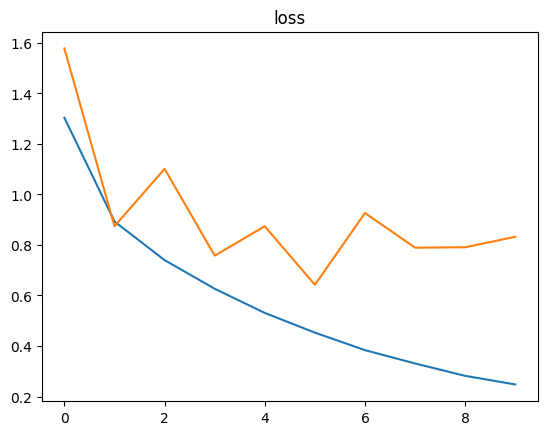

In [13]:
plt.title('loss')
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

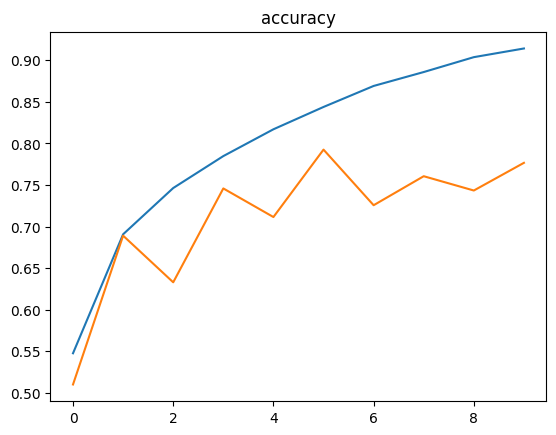

In [14]:
plt.title('accuracy')
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

# Data augmentation
Here we run the model fitting/ training again but with applying data augmentation, we just want to watch the accuracies and see if its any better.

Ideally this should improve the validation accuracy and reduce overfitting

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32

data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] //batch_size
r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25


<ipython-input-15-6589b00be885>:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data=(x_test,y_test), steps_per_epoch=steps_per_epoch, epochs=25)


1562/1562 [==============================] - 39s 24ms/step - loss: 0.6740 - accuracy: 0.7757 - val_loss: 0.6561 - val_accuracy: 0.7835
Epoch 2/25
1562/1562 [==============================] - 38s 24ms/step - loss: 0.5891 - accuracy: 0.7994 - val_loss: 0.6875 - val_accuracy: 0.7799
Epoch 3/25
1562/1562 [==============================] - 39s 25ms/step - loss: 0.5497 - accuracy: 0.8124 - val_loss: 0.9768 - val_accuracy: 0.7087
Epoch 4/25
1562/1562 [==============================] - 38s 24ms/step - loss: 0.5229 - accuracy: 0.8219 - val_loss: 0.5881 - val_accuracy: 0.8113
Epoch 5/25
1562/1562 [==============================] - 38s 24ms/step - loss: 0.4925 - accuracy: 0.8321 - val_loss: 0.5542 - val_accuracy: 0.8096
Epoch 6/25
1562/1562 [==============================] - 38s 24ms/step - loss: 0.4659 - accuracy: 0.8395 - val_loss: 0.5517 - val_accuracy: 0.8178
Epoch 7/25
1562/1562 [==============================] - 38s 24ms/step - loss: 0.4575 - accuracy: 0.8423 - val_loss: 0.5355 - val_accura

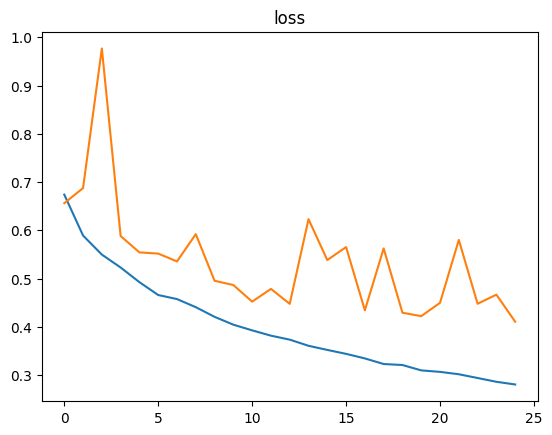

In [16]:
plt.title('loss')
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

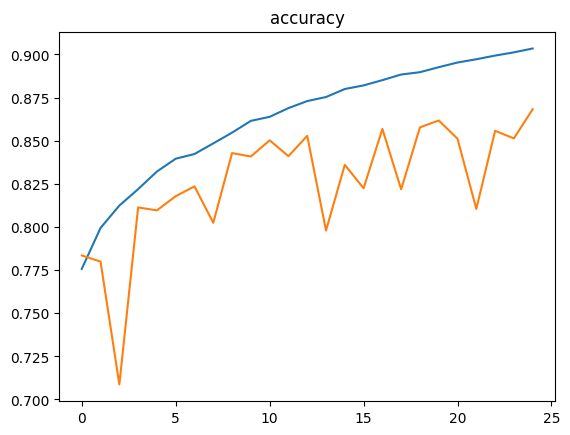

In [17]:
plt.title('accuracy')
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

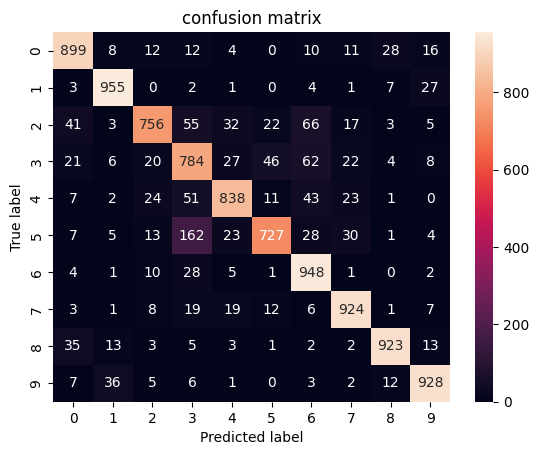

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the confusion matrix
cm = confusion_matrix(y_test, Y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set the labels
plt.title("confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")

# Show the plot
plt.show()


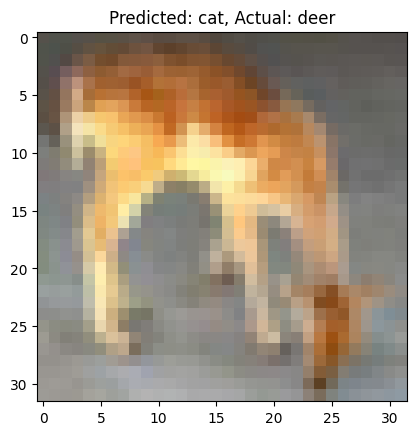

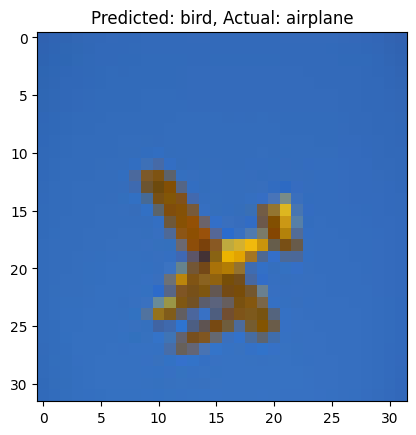

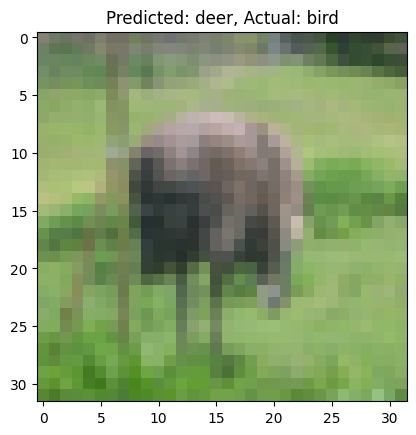

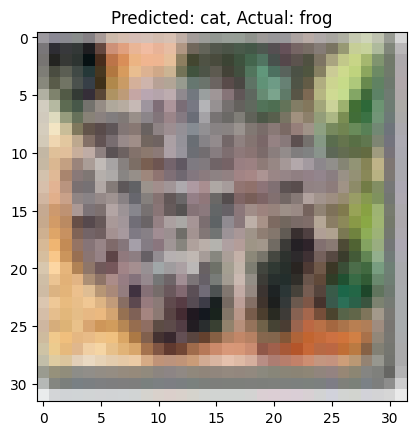

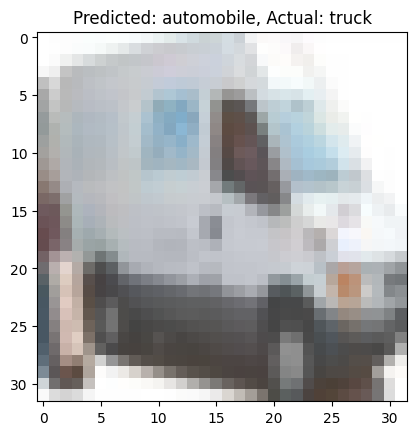

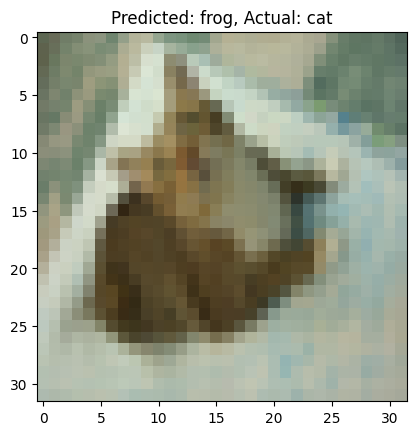

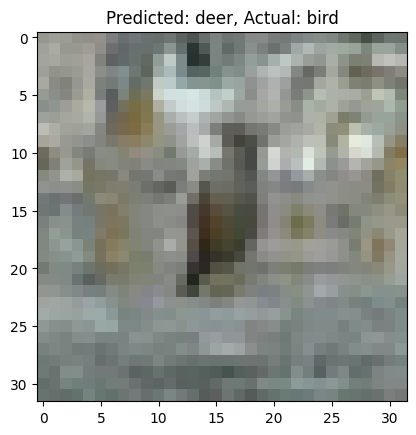

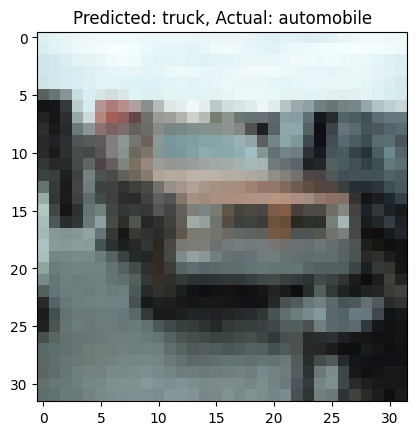

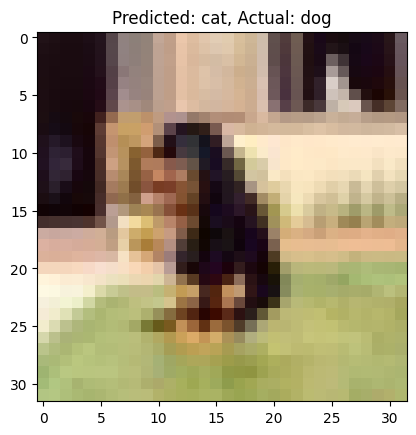

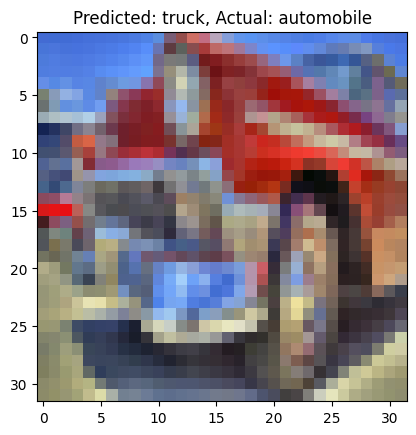

In [19]:
# Lets view 10 random items that we incorrectly predicted

labels = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

incorrect_predictions = np.where(y_test != Y_pred)[0]
random_indices = np.random.choice(incorrect_predictions, 10, replace=False)

for i in random_indices:
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {labels[Y_pred[i]]}, Actual: {labels[y_test[i]]}")
    plt.show()
